<center> <h1> <b>DATA AUGMENTATION<b></h1> </center>
<center> <h1>Tutorial</h1> </center>

In [1]:
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [129]:
paths  = bs.Paths(audios_path="/home/saguileran/audios/Selected/")#, results="new_results")
ploter = bs.Ploter(save=True)
file = str(paths.AudioFiles()[paths.AudioFiles()["Country"] == "Colombia"]["ML Catalog Number"].iloc[0])
file

'187313411'

In [143]:
data = paths.AudioFiles()
data.iloc[0]["ML Catalog Number"]

187313411

Antioquia Colombia


/home/saguileran/miniconda3/lib/python3.8/site-packages/birdsongs-0.1b0-py3.8.egg/birdsongs/ploter.py:108: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


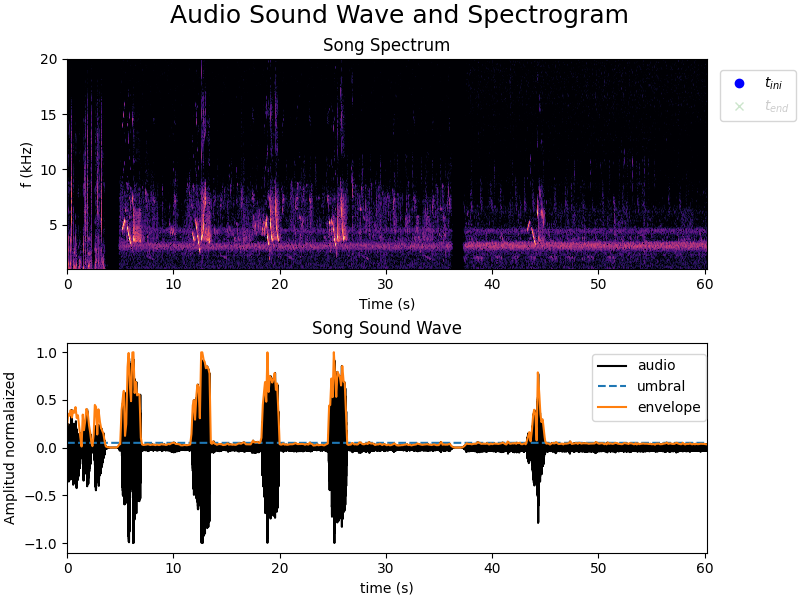

In [148]:
birdsong = bs.BirdSong(paths, file_id=str(data.iloc[1]["ML Catalog Number"]), NN=512, flim=(1e3,20e3), tlim=(0.,60.2), # no_file=0,
                       Nt=5000) #108 172
print(birdsong.state, birdsong.country)
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)

In [132]:
time_interval = Positions(ploter.klicker)[0]
#time_interval = np.array([0.73086296, 1.23026429])
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 0.7341 s, final time 1.2346 s


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/birdsongs-0.1b0-py3.8.egg/birdsongs/ploter.py:165: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


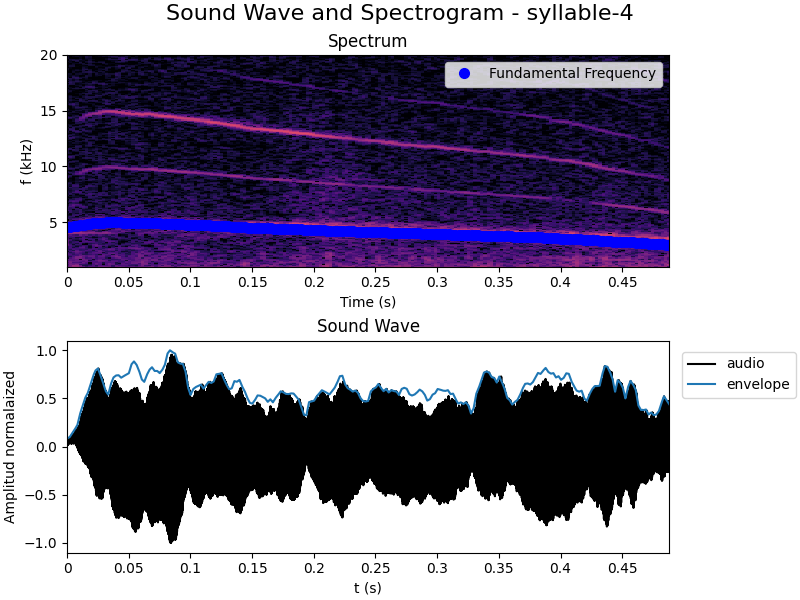

In [133]:
syllable = bs.Syllable(birdsong, tlim=time_interval, flim=birdsong.flim,  NN=birdsong.NN, t0=birdsong.t0,
                       umbral_FF=1.05, no_syllable=4, type="trill")
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [127]:
data[data["ML Catalog Number"]==int("187313411")]

ML Catalog Number Format              Common Name       Scientific Name  \
0          187313411  Audio  Rufous-collared Sparrow  Zonotrichia capensis   

  Background Species    Recordist        Date  Year  Month  Day  ...  \
0               <NA>  Diego Cueva  11/10/2019  2019     11   10  ...   

   eBird Species Code Taxon Category Taxonomic Sort Recordist 2  \
0             rucspa1        Species          31901        <NA>   

  Average Community Rating Number of Ratings  Asset Tags  \
0                      4.5                 2        <NA>   

   Original Image Height Original Image Width label  
0                   <NA>                 <NA>     0  

[1 rows x 46 columns]

In [134]:
info_col, df_col = paths.ImportParameters("187313411")

4 files were found.


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/birdsongs-0.1b0-py3.8.egg/birdsongs/ploter.py:108: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


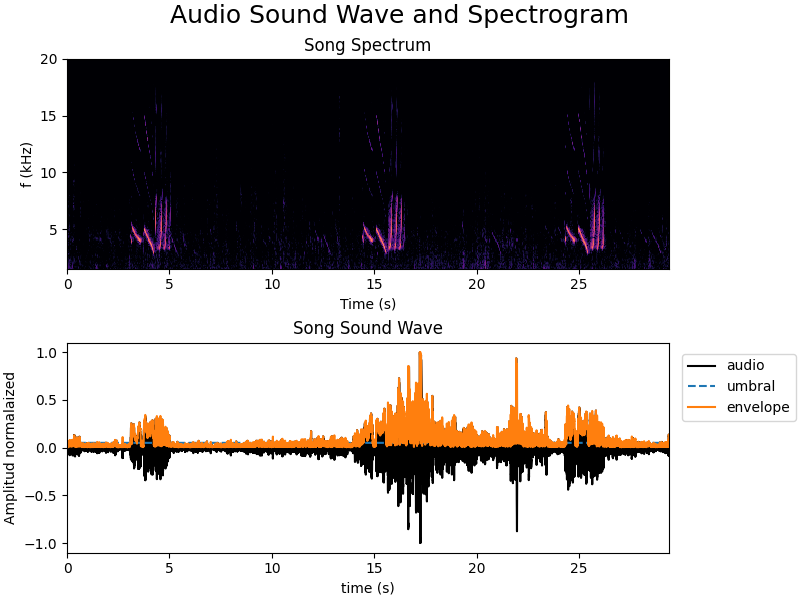

In [135]:
whole_syllable = bs.util.DefineWholeSyllable(paths, df_col)
ploter.Plot(whole_syllable, FF_on=False);
AudioPlay(whole_syllable)

In [136]:
index = 2
syllable, synth_syllable, bw_rate = DefineSyllable(paths, df_col, index)

/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


In [137]:
df_col.iloc[index]

id_XC                                                  187313411
no_syllable                                                    3
id                                                      syllable
name                                                  syllable-3
coef_path      ../examples/results/MotorGestures-parameters/1...
param_path     ../examples/results/MotorGestures-parameters/1...
audio_path        /home/saguileran/audios/Selected/187313411.wav
s              [0.008670747, 0.008824587, 0.00895071, 0.00915...
fs                                                         48000
file_name                                          187313411.wav
t_ini                                                   3.732971
t_end                                                   4.229512
NN                                                           512
umbral_FF                                                   1.05
coef                   value
a0      0.178
a1      0.000
a2  ...
type                     

In [138]:
ploter.Syllables(syllable, synth_syllable);

In [139]:
ploter.Result(syllable, synth_syllable, figsize=(12,6), ylim=(0,100));

In [140]:
AudioPlay(syllable)

In [141]:
AudioPlay(synth_syllable)